<a href="https://colab.research.google.com/github/danielsaggau/IR_LDC/blob/main/model/SCOTUS/log_regression_scotus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence_transformers

In [2]:
!pip install transformers

In [3]:
!pip install datasets 
from datasets import load_dataset
dataset = load_dataset('lex_glue','scotus')

Generating train split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Dataset lex_glue downloaded and prepared to /root/.cache/huggingface/datasets/lex_glue/scotus/1.0.0/8a66420941bf6e77a7ddd4da4d3bfb7ba88ef48c1d55302a568ac650a095ca3a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
access="XXXX"
model_name = 'danielsaggau/longformer_simcse_scotus'
model_name_bregman= '/content/drive/MyDrive/bregman_scotus_k10_ep10'
train_batch_size = 6
max_seq_length = 4096
num_epochs = 1
from sentence_transformers import SentenceTransformer
model = SentenceTransformer(model_name, use_auth_token=access)
model_bregman = SentenceTransformer(model_name_bregman, use_auth_token=access)

Downloading:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/124 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/702k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/453 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/222k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
model_bregman

In [ ]:
'train_loss = losses.MultipleNegativesRankingLoss(model)

In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer, InputExample, losses, models, datasets, evaluation
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import torch
import random
import torch

def set_seed(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)

In [8]:
train_df = dataset['train']
eval_df = dataset['validation']
text_col=train_df['text'] 
category_col=train_df['label']
x_eval = eval_df['text']
y_eval = eval_df['label']

In [ ]:
st_model = 'danielsaggau/legal_long_bert'
orig_model = SentenceTransformer(st_model,use_auth_token=access)

In [ ]:
import pandas as pd 
pd.DataFrame(train_df)

In [11]:
train_samples =[]
for line in text_col:
        line = line.strip()
        if len(line) >= 10:
            train_samples.append(InputExample(texts=[line, line]))

In [12]:
len(train_samples)

5000

In [16]:
X_train_noFT = orig_model.encode(text_col,show_progress_bar=True)
X_eval_noFT = orig_model.encode(x_eval,show_progress_bar=True)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
sgd =  LogisticRegression(max_iter=20000)
sgd.fit(X_train_noFT, category_col)
y_pred_eval_sgd = sgd.predict(X_eval_noFT)

In [ ]:
print('f1 micro No Fit', f1_score(y_eval, y_pred_eval_sgd, average="micro"))
print('f1 macro No Fit', f1_score(y_eval, y_pred_eval_sgd, average="macro"))

In [15]:
X_train = model.encode(text_col,show_progress_bar=True)
X_eval = model.encode(x_eval,show_progress_bar=True)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

In [14]:
X_train_b = model_bregman.encode(text_col,show_progress_bar=True)
X_eval_b = model_bregman.encode(x_eval,show_progress_bar=True)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
sgd =  LogisticRegression(max_iter=20000)
sgd.fit(X_train, category_col)
y_pred_eval_sgd = sgd.predict(X_eval)

In [ ]:
print('f1 micro Fit', f1_score(y_eval, y_pred_eval_sgd, average="micro"))
print('f1 macro Fit', f1_score(y_eval, y_pred_eval_sgd, average="macro"))
print('Acc. SetFit', accuracy_score(y_eval, y_pred_eval_sgd))
print('Precision micro SetFit', precision_score(y_eval, y_pred_eval_sgd,average="micro"))
print('Precision macro SetFit', precision_score(y_eval, y_pred_eval_sgd,average="macro"))

f1 micro Fit 0.6957142857142857
f1 macro Fit 0.6085958331125504
Acc. SetFit 0.6957142857142857
Precision micro SetFit 0.6957142857142857
Precision macro SetFit 0.6487521171168334


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


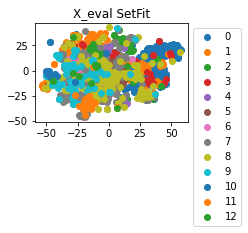

In [ ]:
#Plot X_eval SetFit
X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval))
plt.subplot(224)
plt.title('X_eval SetFit')

for i, t in enumerate(set(np.array(y_eval))):
      idx = np.array(y_eval) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));


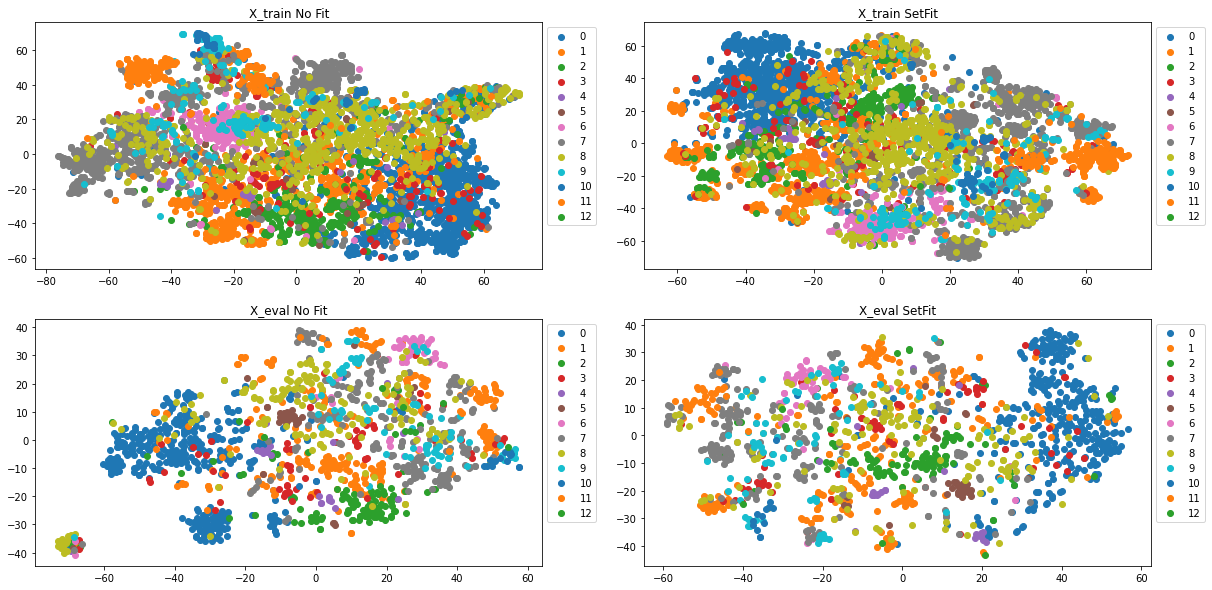

In [ ]:
#Plot 2-D 2x2 figures
plt.figure(figsize=(20,10))

#Plot X_train_noFit
X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train_noFT))
plt.subplot(221)
plt.title('X_train No Fit')

for i, t in enumerate(set(np.array(category_col))):
      idx = np.array(category_col) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));

#Plot X_eval noFit
X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval_noFT))
plt.subplot(223)
plt.title('X_eval No Fit')

for i, t in enumerate(set(np.array(y_eval))):
      idx = np.array(y_eval) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));


#Plot X_train SetFit
X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train_b))

plt.subplot(222)
plt.title('X_train SetFit')

for i, t in enumerate(set(np.array(category_col))):
      idx = np.array(category_col) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));

#Plot X_eval SetFit
X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval_b))
plt.subplot(224)
plt.title('X_eval SetFit')

for i, t in enumerate(set(np.array(y_eval))):
      idx = np.array(y_eval) == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

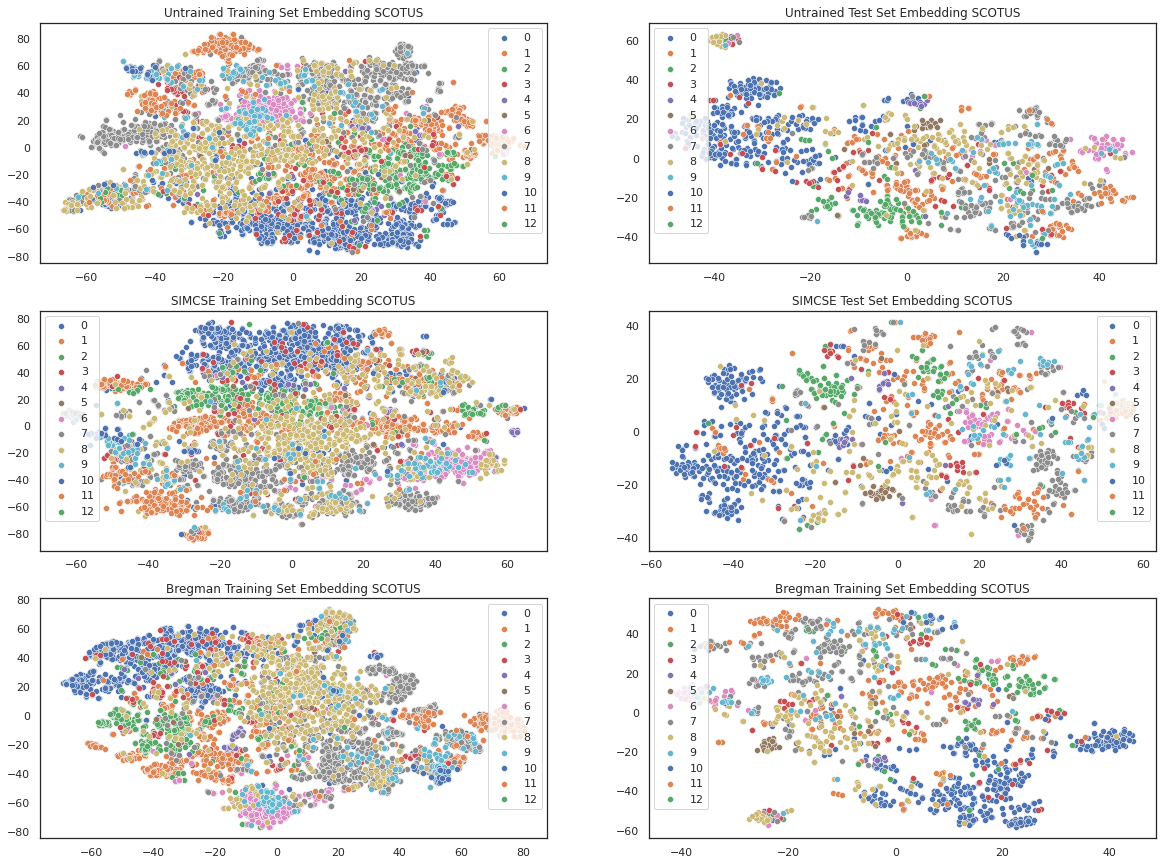

In [31]:
## new plot 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
sns.despine()
fig, ax = plt.subplots(3,2 ,figsize=(20,15))

X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train_noFT))
for i, t in enumerate(set(np.array(category_col))):
      idx = np.array(category_col) == t
      sns.scatterplot(X_embedded[idx, 0], X_embedded[idx, 1], label=t, ax=ax[0,0]).set_title("Untrained Training Set Embedding SCOTUS")


X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval_noFT))
for i, t in enumerate(set(np.array(y_eval))):
    idx = np.array(y_eval) == t
    sns.scatterplot(X_embedded[idx, 0], X_embedded[idx, 1], label=t, ax=ax[0,1]).set_title("Untrained Test Set Embedding SCOTUS")

X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train))
for i, t in enumerate(set(np.array(category_col))):
      idx = np.array(category_col) == t
      sns.scatterplot(X_embedded[idx, 0], X_embedded[idx, 1], label=t, ax=ax[1,0]).set_title("SIMCSE Training Set Embedding SCOTUS")

X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval))
for i, t in enumerate(set(np.array(y_eval))):
    idx = np.array(y_eval) == t
    sns.scatterplot(X_embedded[idx, 0], X_embedded[idx, 1], label=t, ax=ax[1,1]).set_title("SIMCSE Test Set Embedding SCOTUS")

X_embedded = TSNE(n_components=2).fit_transform(np.array(X_train_b))
for i, t in enumerate(set(np.array(category_col))):
      idx = np.array(category_col) == t
      sns.scatterplot(X_embedded[idx, 0], X_embedded[idx, 1], label=t, ax=ax[2,0]).set_title("Bregman Training Set Embedding SCOTUS")

X_embedded = TSNE(n_components=2).fit_transform(np.array(X_eval_b))
for i, t in enumerate(set(np.array(y_eval))):
    idx = np.array(y_eval) == t
    sns.scatterplot(X_embedded[idx, 0], X_embedded[idx, 1], label=t, ax=ax[2,1]).set_title("Bregman Training Set Embedding SCOTUS")

plt.save("scatterplots.png", format="png", dpi=500)